<h1>Japanese abbreviations - 略語</h1>
<br>Japanese abbreviations are said to be mostly 4-moraic.<br>Let's see if it's true or not.

In [1]:
%matplotlib inline
# -*- coding: utf-8 -*-
from __future__ import division
import ryakugo
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pylab as pylab
#pylab.rcParams['figure.figsize'] = 15, 10  # adjusting plots size in notebook
seaborn.set_context("notebook")

I'll use EDICT2 dictionary as data source, it have (abbr) tags, which indicate abbreviations, and links to full words, extremely useful to find some abbreviation patterns.<br>That's how do you use edict interface - it's just a dictionary as is:

In [2]:
entry = ryakugo.d[u"民暴"]
print entry.word
for reading in entry.readings: print ryakugo.take_first_word_only(reading)
for sense in entry.senses: print sense

民暴
みんぼう
(n) (abbr) (See 民事介入暴力) racketeering by interceding in civil disputes and threatening the use of violence
EntL2741930


<hr>
Let's extract all abbreviated words, with (abbr) tag from EDICT2.<br>
Below you can see 2738 words of lengths from 1 to 19. <br>
We'll extract reading and length in morae (e.g. kana symbols)

In [3]:
df_lengths = pd.DataFrame(ryakugo.japanese_length_by_word)
df_lengths.sort_values(by="length", ascending=False)

,length,reading,word
2725,19,かんたいへいようけざいれんけいきょうてい,環太平洋経済連携協定
1726,18,こうこうそつぎょうていどにんていしけん,高校卒業程度認定試験
865,17,とくていがいらいせいぶつぼうしほう,特定外来生物防止法
1899,13,べいれんぽうじゅんびりじかい,米連邦準備理事会
2473,12,とくめいたんとうだいじん,特命担当大臣
1764,12,こっかこうあんいいんちょう,国家公安委員長
208,11,マグネチックスピーカー,マグネチックスピーカー
1453,11,こくれんあんぽりじかい,国連安保理事会
2104,11,にちべいあんぽじょうやく,日米安保条約
2273,10,しょくひんせいぶんひょう,食品成分表


Counting totals in the sample, get the following:<br>

In [5]:
print "Total abbreviated words in sample:", len(ryakugo.d)
print "Length : Words in sample"
for length in ryakugo.jap_count: print length, ":", ryakugo.jap_count[length]

Total abbreviated words in sample: 2738
Length : Words in sample
1 : 33
2 : 344
3 : 649
4 : 1189
5 : 215
6 : 164
7 : 54
8 : 52
9 : 20
10 : 9
11 : 3
12 : 2
13 : 1
17 : 1
18 : 1
19 : 1


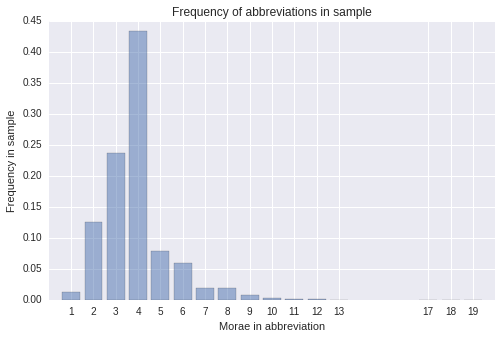

In [103]:
x_pos = sorted([x[0] for x in ryakugo.mcf_j])
d = dict(ryakugo.mcf_j)
plt.figure(figsize=(8,5))
plt.bar(x_pos, [d[n] for n in d], align='center', alpha=0.5)
plt.xticks(x_pos, [n for n in d])
plt.title("Frequency of abbreviations in sample")
plt.xlabel("Morae in abbreviation")
plt.ylabel("Frequency in sample")
plt.grid(True)
plt.show()

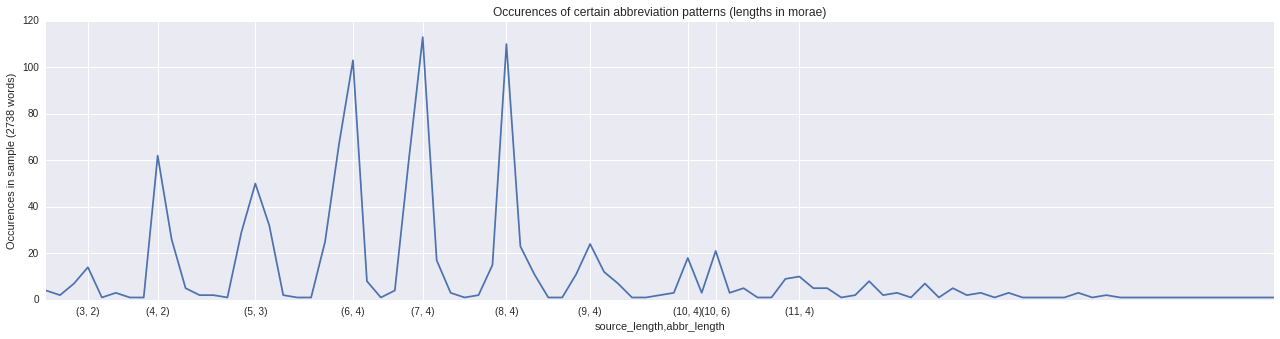

In [111]:
df1 = pd.DataFrame(ryakugo.jap_lwr)
dep = df1.groupby(["source_length","abbr_length"]).size()
plt.figure(figsize=(22,5)); plt.title("Occurences of certain abbreviation patterns (lengths in morae)")
plt.ylabel("Occurences in sample (%d words)" % len(ryakugo.d)) 
l = [3, 8, 15, 22, 27, 33, 39, 46, 48, 54]  # it's a kind of magic
plt.xticks(l)
ax = dep.plot(); plt.show()

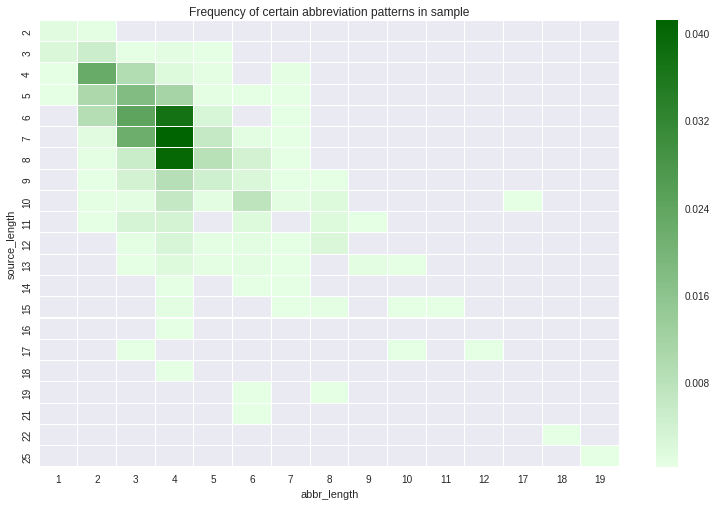

In [105]:
df2 = pd.DataFrame([{'source_length': a[0],'abbr_length': a[1],'count': ryakugo.matrix_lwr[a]/len(ryakugo.d)} for a in ryakugo.matrix_lwr])
df2p = df2.pivot('source_length','abbr_length','count')

plt.figure(figsize=(13,8))
plt.xlabel("Abbreviated length, morae")
plt.ylabel("Full length, morae")
plt.title("Frequency of certain abbreviation patterns in sample")
seaborn.heatmap(df2p, 
                #annot=True, 
                #fmt="f", 
                linewidths=.01,
                linecolor="white",
                cmap=seaborn.light_palette("darkgreen",as_cmap=True))
plt.show()

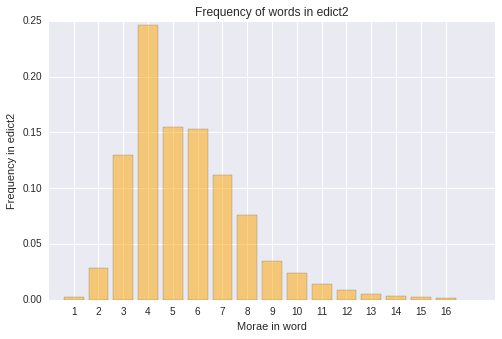

In [5]:
all_lengths_by_word = ryakugo.length_by_word(ryakugo.edict)
all_counts = ryakugo.count_of_lengths(all_lengths_by_word)
all_most_common_freqs = ryakugo.most_common_freqs(all_counts,ryakugo.edict)

x_pos = sorted([x[0] for x in all_most_common_freqs])
d = dict(all_most_common_freqs)
plt.figure(figsize=(8,5))
plt.bar(x_pos, [d[n] for n in d], align='center', alpha=0.5, color="orange")
plt.xticks(x_pos, [n for n in d])
plt.title("Frequency of words in edict2")
plt.xlabel("Morae in word")
plt.ylabel("Frequency in edict2")
plt.grid(True)
plt.show()